<a href="https://colab.research.google.com/github/Sodaez/LE2_MAAC_M/blob/main/LE2_MAAC_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

blood = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/blood_dataset.csv')
blood.head() #returns the first few rows
blood.info() #displays the data type and number of missing values.
blood.shape #returns the number of rows and columns of the DataFrame.
blood.describe() #calculates a few summary statistics for each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


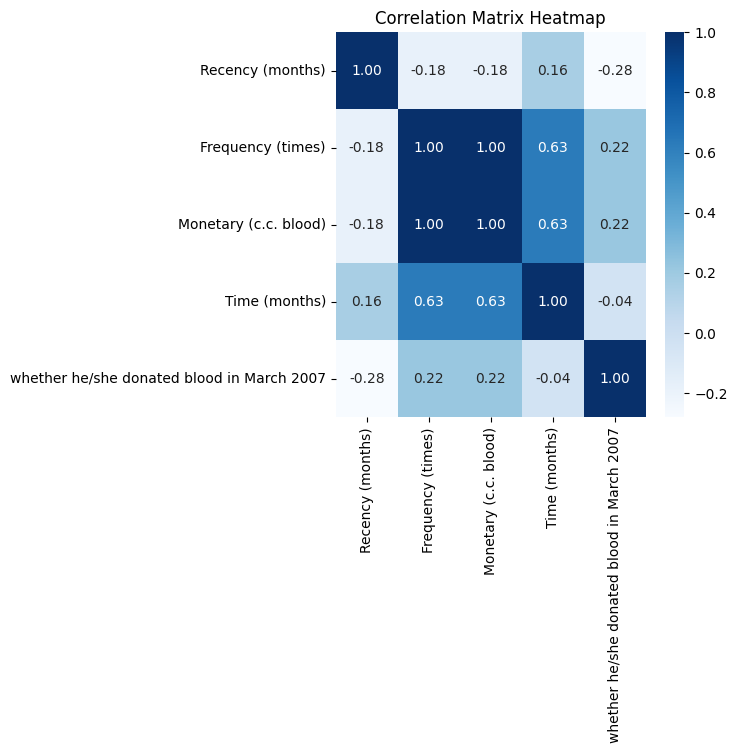

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['Recency (months)','Frequency (times)','Monetary (c.c. blood)', 'Time (months)', 'whether he/she donated blood in March 2007']

blood_selected = blood[columns]
plt.figure(figsize=(5, 5))
sns.heatmap(blood_selected.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [122]:
#features and target
X = blood[['Recency (months)','Frequency (times)','Monetary (c.c. blood)', 'Time (months)']]
y = blood['whether he/she donated blood in March 2007']

#80%trainingsize, 20%testingsize,
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 42)

In [123]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = {

    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
}

for default, cf in model.items():
    cf.fit(X_train, y_train)

    y_test_pred = cf.predict(X_test)

    cm = confusion_matrix(y_test, y_test_pred)

    accuracy = accuracy_score(y_test, y_test_pred)
    accuracy_percentage = accuracy * 100
    print(f"{default} Accuracy: {accuracy_percentage:.2f}%")

    class_report = classification_report(y_test, y_test_pred)
    print(f"{default} (Classification Report):\n{class_report}")

    #print(f"{ml_acc}:")
    #print(f" Accuracy: {accuracy_percentage}")
    #print(f" Recall: {recall_percentage}")
    #print(f" Precision: {precision_percentage}")
    #print(f" F1 score: {f1_percentage}")

Random Forest Accuracy: 73.33%
Random Forest (Classification Report):
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       113
           1       0.43      0.27      0.33        37

    accuracy                           0.73       150
   macro avg       0.61      0.58      0.58       150
weighted avg       0.70      0.73      0.71       150

KNN Accuracy: 70.67%
KNN (Classification Report):
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       113
           1       0.38      0.30      0.33        37

    accuracy                           0.71       150
   macro avg       0.58      0.57      0.57       150
weighted avg       0.69      0.71      0.69       150

SVM Accuracy: 76.00%
SVM (Classification Report):
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       113
           1       1.00      0.03      0.05        37

    accuracy

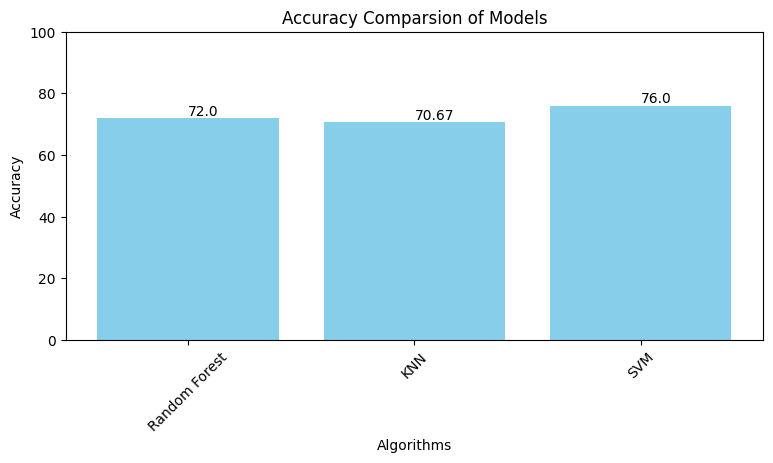

In [124]:
mod_acc = {}

for default, cf in model.items():
    cf.fit(X_train, y_train)
    y_pred = cf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    mod_acc[default] = accuracy * 100

plt.figure(figsize=(9, 4))
bars = plt.bar(mod_acc.keys(), mod_acc.values(), color='skyblue')
plt.ylim(0, 100)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparsion of Models')
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Ensemble Results:
AdaBoost: 75.3333
Bagging: 76.0000
Stacking: 75.3333
SVM: 76.0000


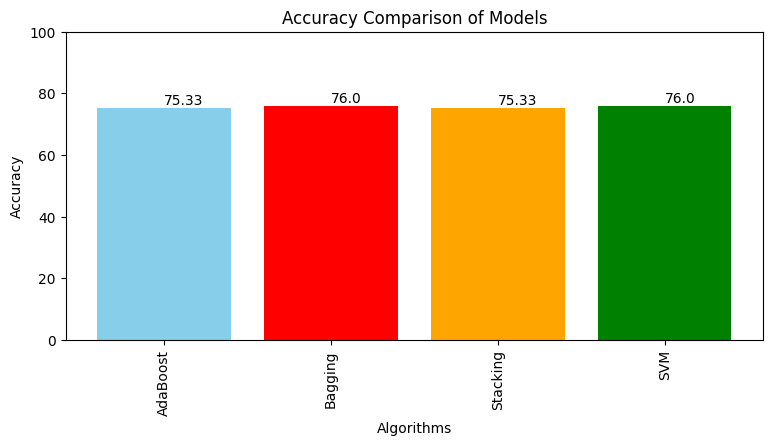

In [125]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

tp_cf = max(mod_acc, key=mod_acc.get)
tp_md = alg[tp_cf]

aboost_ens = AdaBoostClassifier(base_estimator=tp_md, n_estimators=100, algorithm='SAMME')
aboost_ens.fit(X_train, y_train)
aboost_score = aboost_ens.score(X_test, y_test)

bag_ens = BaggingClassifier(base_estimator=tp_md, n_estimators=100)
bag_ens.fit(X_train, y_train)
bag_score = bag_ens.score(X_test, y_test)

stack_ens = StackingClassifier(estimators=[('highest_model', tp_md)], final_estimator=LogisticRegression(max_iter=10000))
stack_ens.fit(X_train, y_train)
stack_score = stack_ens.score(X_test, y_test)

classifier = {
    "AdaBoost": aboost_score * 100,
    "Bagging": bag_score * 100,
    "Stacking": stack_score * 100,
    tp_cf: accuracy_highest * 100
}

plt.figure(figsize=(9, 4))
bars = plt.bar(classifier.keys(), classifier.values(), color=['skyblue', 'red', 'orange', 'green'])
plt.ylim(0, 100)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')

plt.xticks(rotation=90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

print("Ensemble Results:")
for model, accuracy in classifier.items():
    print(f"{model}: {accuracy:.4f}")
